In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import tensorflow as tfm
if tfm.test.gpu_device_name():
  print (f'Se encontró el siguientr GPU: {tfm.test.gpu_device_name()}')
else:
  print('Aqui no hay GPU´s')

Se encontró el siguientr GPU: /device:GPU:0


In [4]:
encodings = ['utf-8', 'ISO-8859-1', 'latin1']

for encoding in encodings:
    try:
        df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/NLP/DisneylandReviews.csv', encoding=encoding)
        print("File read successfully with encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Error reading the file with encoding:", encoding)
df.head()


Error reading the file with encoding: utf-8
File read successfully with encoding: ISO-8859-1


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [5]:
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [6]:
df.duplicated().sum()

12

In [7]:
df.drop_duplicates(keep='first', inplace=True)

In [8]:
df['Reviewer_Location'].value_counts()

United States     14545
United Kingdom     9751
Australia          4677
Canada             2234
India              1511
                  ...  
Namibia               1
Armenia               1
Timor-Leste           1
South Sudan           1
Åland Islands         1
Name: Reviewer_Location, Length: 162, dtype: int64

In [9]:
df['Reviewer_Location'].unique()

array(['Australia', 'Philippines', 'United Arab Emirates',
       'United Kingdom', 'Singapore', 'India', 'Malaysia',
       'United States', 'Canada', 'Myanmar (Burma)', 'Hong Kong', 'China',
       'Indonesia', 'Qatar', 'New Zealand', 'Sri Lanka', 'Uganda',
       'Thailand', 'Austria', 'South Africa', 'Saudi Arabia', 'Japan',
       'Israel', 'South Korea', 'Turkey', 'Macau', 'Egypt', 'Mexico',
       'Mauritius', 'Sweden', 'Brazil', 'Kenya', 'Vietnam', 'Portugal',
       'Cambodia', 'Zambia', 'Croatia', 'France', 'Taiwan', 'Oman',
       'Colombia', 'Norway', 'Kuwait', 'Netherlands', 'Barbados',
       'Finland', 'Bosnia and Herzegovina', 'Brunei', 'Bahrain',
       'Maldives', 'Ireland', 'Russia', 'Romania',
       'Northern Mariana Islands', 'Germany', 'Chile', 'Isle of Man',
       'Pakistan', 'Ukraine', 'Greece', 'Switzerland', 'Spain', 'Estonia',
       "Côte d'Ivoire", 'Guam', 'Bangladesh', 'Belgium', 'Italy',
       'Botswana', 'Denmark', 'Argentina', 'Peru', 'Lithuania', 'I

In [10]:
df['Rating'].value_counts()

5    23140
4    10771
3     5107
2     2127
1     1499
Name: Rating, dtype: int64

In [11]:
df['Branch'].value_counts()

Disneyland_California    19404
Disneyland_Paris         13629
Disneyland_HongKong       9611
Name: Branch, dtype: int64

In [12]:
import re
import nltk
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
def preprocesamiento_texto(texto):

    # haces todo el texto en minúsculas
    texto=texto.lower()

    # regex para caracteres especiales y números
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)

    # tokenizar el texto
    texto_tokenized= word_tokenize(texto)

    # eliminar stopwords
    texto_no_stop = [token for token in texto_tokenized if token not in stop_words_en]

    # lematizar/unir las palabras procesadas nuevamente en una cadena
    final= [lemmatizer.lemmatize (word) for word in texto_no_stop]
    final=' '.join(final)

    return final

In [14]:
df['texto_limpio'] = df['Review_Text'].apply(preprocesamiento_texto)
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,texto_limpio
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,youve ever disneyland anywhere youll find disn...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,since last time visit hk disneyland yet time s...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,thanks god hot humid visiting park otherwise w...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,hk disneyland great compact park unfortunately...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,location city took around hour kowlon kid like...


In [15]:
def sentiment(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [16]:
df['Sentiment'] = df['Rating'].apply(sentiment)
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,texto_limpio,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,youve ever disneyland anywhere youll find disn...,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,since last time visit hk disneyland yet time s...,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,thanks god hot humid visiting park otherwise w...,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,hk disneyland great compact park unfortunately...,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,location city took around hour kowlon kid like...,Positive


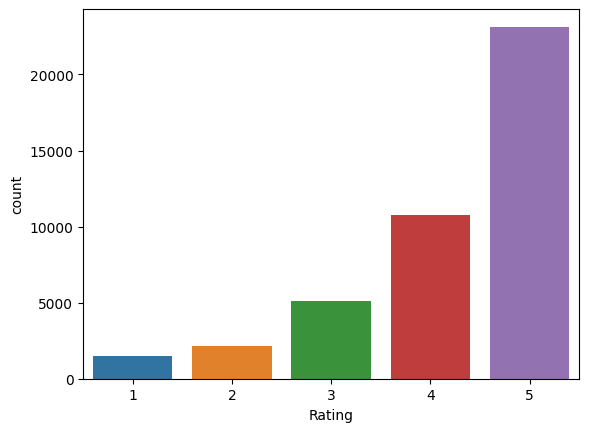

In [17]:
sns.countplot(x=df['Rating'])
plt.show()

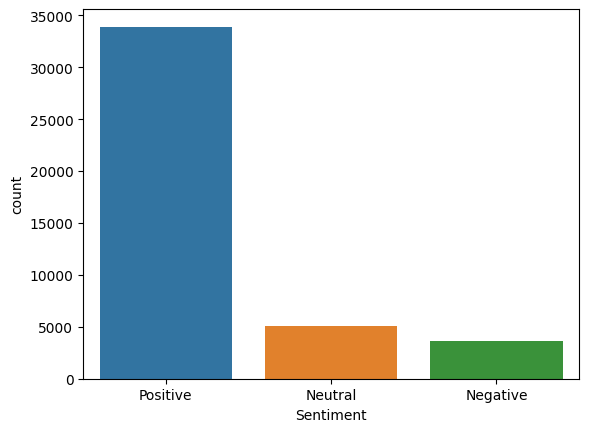

In [18]:
sns.countplot(x=df['Sentiment'])
plt.show()

In [19]:
pos = df[df['Sentiment'] == 'Positive'].sample(3000)
neg = df[df['Sentiment'] == 'Negative'].sample(3000)
neu = df[df['Sentiment'] == 'Neutral'].sample(3000)

df = pd.concat([pos,neg,neu],axis=0)
df.shape

(9000, 8)

In [20]:
embeddings = {}

with open('/content/gdrive/MyDrive/Colab Notebooks/NLP/glove.6B/glove.6B.300d.txt', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:])
        embeddings[word] = vectors

def vectorize(text):
    vector_size = 300
    texto = text.lower()
    texto = re.sub(r'[^a-zA-Z0-9\s]', '',texto)
    texto = word_tokenize(texto)
    texto = [palabra for palabra in texto if palabra not in stop_words_en]
    texto = [lemmatizer.lemmatize(palabra)for palabra in texto]
    vector = np.zeros(vector_size)
    for palabra in texto:
        if palabra in embeddings:
            vector = vector + embeddings[palabra].astype('float')
        else:
            print(f"No hay un embedding para la palabra {palabra}. Omitiendo...")
    vector = vector.reshape(1,-1)[0]
    return vector

In [21]:
df['vector']=df['Review_Text'].apply(vectorize)
df.head(10)

Se han truncado las últimas 5000 líneas del flujo de salida.
No hay un embedding para la palabra fastpasses. Omitiendo...
No hay un embedding para la palabra 1030pm. Omitiendo...
No hay un embedding para la palabra 1030pm. Omitiendo...
No hay un embedding para la palabra 1035pm. Omitiendo...
No hay un embedding para la palabra 1055pm. Omitiendo...
No hay un embedding para la palabra 1104pm. Omitiendo...
No hay un embedding para la palabra accusational. Omitiendo...
No hay un embedding para la palabra experienceoverall. Omitiendo...
No hay un embedding para la palabra childern. Omitiendo...
No hay un embedding para la palabra wgen. Omitiendo...
No hay un embedding para la palabra undersatandably. Omitiendo...
No hay un embedding para la palabra kidsmore. Omitiendo...
No hay un embedding para la palabra parkthe. Omitiendo...
No hay un embedding para la palabra kongese. Omitiendo...
No hay un embedding para la palabra experiencewhere. Omitiendo...
No hay un embedding para la palabra weren

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,texto_limpio,Sentiment,vector
33116,424741481,5,2016-10,United Kingdom,Lovely place just the right size for younger c...,Disneyland_Paris,lovely place right size younger child get late...,Positive,"[-4.1689092, 1.5641892, -4.854347500000001, -0..."
20569,237852749,5,2014-10,United States,while it doesnt have the big bang rides of o...,Disneyland_California,doesnt big bang ride park best cleanest well a...,Positive,"[0.21616500000000005, 1.7279570000000002, -1.6..."
24746,155296777,5,2013-3,Netherlands,"This park is amazing. There is no detail, no m...",Disneyland_California,park amazing detail matter small get overlooke...,Positive,"[-2.496915, 5.985512699999999, -3.229176500000..."
15986,359301345,5,2015-5,Australia,Our son has multiple disabilities and it was a...,Disneyland_California,son multiple disability struggle get californi...,Positive,"[-1.278879, -0.5686132700000001, 1.239926, -4...."
33649,391462458,5,2016-7,Qatar,"Never miss the 5:30 pm grand parade, it is ind...",Disneyland_Paris,never miss pm grand parade indeed unforgettabl...,Positive,"[-3.1051517, -0.4542489699999996, -3.382698399..."
28869,7218080,5,missing,United States,We had an excellent experience at the Disneyla...,Disneyland_California,excellent experience disneyland resort disneyl...,Positive,"[-11.121213199999998, -2.6542895000000017, -12..."
10096,636375020,5,2018-11,United States,Disneyland is still the happiest place on eart...,Disneyland_California,disneyland still happiest place earth true esp...,Positive,"[-2.506597, 0.1883260000000002, -1.14963159999..."
38077,211879334,5,2014-6,United States,Living in Florida and having been to Disney Wo...,Disneyland_Paris,living florida disney world dozen time paris d...,Positive,"[-11.666334999999998, 1.9857208000000008, -12...."
18467,288571975,5,2015-7,United States,"Ist time at Disneyland, I enjoyed it and would...",Disneyland_California,ist time disneyland enjoyed would go back firs...,Positive,"[-4.525574599999999, 4.6835876999999995, -8.62..."
6722,234981020,5,2014-5,United Kingdom,This was an oportunity for us (a mid 20s coupl...,Disneyland_HongKong,oportunity u mid couple big kid day something ...,Positive,"[-8.0342845, -1.7297508000000001, -5.664385999..."


In [22]:
mapper={
    'Negative':0,
    'Neutral':1,
    'Positive':2,
}

df['Sentiment']= df['Sentiment'].map(mapper)
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,texto_limpio,Sentiment,vector
33116,424741481,5,2016-10,United Kingdom,Lovely place just the right size for younger c...,Disneyland_Paris,lovely place right size younger child get late...,2,"[-4.1689092, 1.5641892, -4.854347500000001, -0..."
20569,237852749,5,2014-10,United States,while it doesnt have the big bang rides of o...,Disneyland_California,doesnt big bang ride park best cleanest well a...,2,"[0.21616500000000005, 1.7279570000000002, -1.6..."
24746,155296777,5,2013-3,Netherlands,"This park is amazing. There is no detail, no m...",Disneyland_California,park amazing detail matter small get overlooke...,2,"[-2.496915, 5.985512699999999, -3.229176500000..."
15986,359301345,5,2015-5,Australia,Our son has multiple disabilities and it was a...,Disneyland_California,son multiple disability struggle get californi...,2,"[-1.278879, -0.5686132700000001, 1.239926, -4...."
33649,391462458,5,2016-7,Qatar,"Never miss the 5:30 pm grand parade, it is ind...",Disneyland_Paris,never miss pm grand parade indeed unforgettabl...,2,"[-3.1051517, -0.4542489699999996, -3.382698399..."


In [23]:
from sklearn.model_selection import train_test_split

X_cnn = np.array(df['vector'].tolist())
y_cnn = df['Sentiment']

X_train_cnn,X_test_cnn,y_train_cnn,y_test_cnn = train_test_split(X_cnn,
                                                 y_cnn,
                                                 train_size=0.75,
                                                 random_state=101,
                                                 stratify=y_cnn)

In [24]:
y_test_cnn.shape

(2250,)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler_cnn = MinMaxScaler()
X_train_cnn = scaler_cnn.fit_transform(X_train_cnn)
X_test_cnn = scaler_cnn.transform(X_test_cnn)

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [27]:
early_stopping_cnn= EarlyStopping(monitor='val_loss',
                              patience=7,
                              restore_best_weights=True)

In [28]:
y_train_cnn

6618     0
14033    0
16514    2
30918    2
39603    0
        ..
40119    1
3468     1
41582    2
29489    2
23032    1
Name: Sentiment, Length: 6750, dtype: int64

In [29]:
y_train_cnn=to_categorical(y_train_cnn,3)
y_test_cnn=to_categorical(y_test_cnn,3)

In [30]:
y_train_cnn.shape

(6750, 3)

In [31]:
y_train_cnn

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [32]:
X_train_cnn= X_train_cnn.reshape(X_train_cnn.shape[0], X_train_cnn.shape[1],1)
X_test_cnn= X_test_cnn.reshape(X_test_cnn.shape[0], X_test_cnn.shape[1],1)

In [33]:
model_cnn=Sequential()
model_cnn.add(Conv1D(32,2, activation='relu', input_shape=X_train_cnn[0].shape))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.35))
model_cnn.add(Dense(3, activation='softmax'))

model_cnn.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
history_cnn=model_cnn.fit(X_train_cnn,
                  y_train_cnn,
                  epochs=100,
                  validation_data=(X_test_cnn, y_test_cnn),
                  callbacks=[early_stopping_cnn])

Epoch 1/100
211/211 [==============================] - 6s 7ms/step - loss: 1.1014 - accuracy: 0.3354 - val_loss: 1.0986 - val_accuracy: 0.3329
Epoch 2/100
211/211 [==============================] - 1s 6ms/step - loss: 1.0987 - accuracy: 0.3295 - val_loss: 1.0986 - val_accuracy: 0.3329
Epoch 3/100
211/211 [==============================] - 1s 6ms/step - loss: 1.0988 - accuracy: 0.3249 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 4/100
211/211 [==============================] - 1s 6ms/step - loss: 1.0987 - accuracy: 0.3301 - val_loss: 1.0986 - val_accuracy: 0.3342
Epoch 5/100
211/211 [==============================] - 1s 6ms/step - loss: 1.0986 - accuracy: 0.3305 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/100
211/211 [==============================] - 1s 5ms/step - loss: 1.0987 - accuracy: 0.3280 - val_loss: 1.0986 - val_accuracy: 0.3342
Epoch 7/100
211/211 [==============================] - 1s 5ms/step - loss: 1.0987 - accuracy: 0.3270 - val_loss: 1.0986 - val_accuracy: 0.3333

In [35]:
metrics_cnn=pd.DataFrame(history_cnn.history)
metrics_cnn.head()

,loss,accuracy,val_loss,val_accuracy
0,1.101374,0.335407,1.098650,0.332889
1,1.098722,0.329481,1.098623,0.332889
2,1.098828,0.324889,1.098627,0.332444
3,1.098717,0.330074,1.098610,0.334222
4,1.098581,0.330519,1.098624,0.333333


<Axes: >

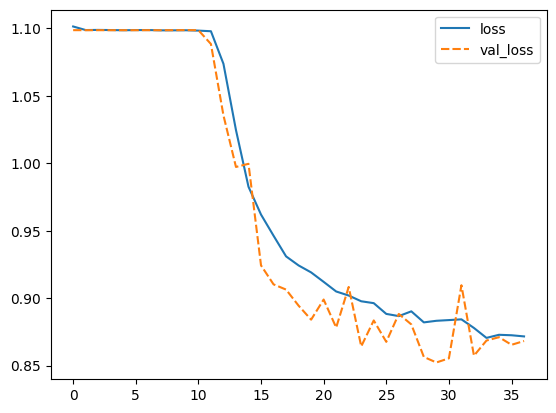

In [36]:
import seaborn as sns
sns.lineplot(data=metrics_cnn[['loss', 'val_loss']])

<Axes: >

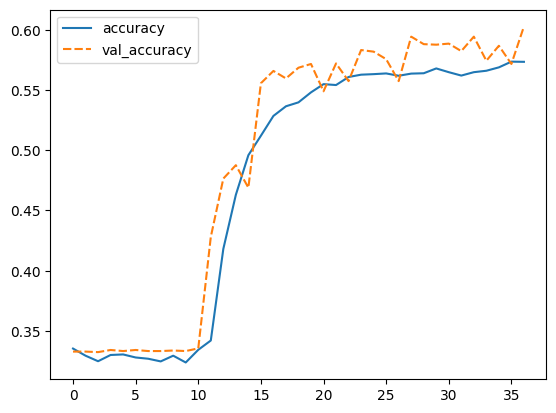

In [37]:
sns.lineplot(data=metrics_cnn[['accuracy', 'val_accuracy']])

In [38]:
y_pred_cnn=model_cnn.predict(X_test_cnn)

71/71 [==============================] - 0s 2ms/step


In [39]:
y_pred_cnn=np.argmax(model_cnn.predict(X_test_cnn), axis=-1)
y_pred_cnn

71/71 [==============================] - 0s 2ms/step


array([0, 2, 1, ..., 0, 1, 0])

In [40]:
y_test_cnn=np.argmax(y_test_cnn, axis=-1)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_cnn, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66       750
           1       0.43      0.30      0.35       750
           2       0.64      0.76      0.70       750

    accuracy                           0.59      2250
   macro avg       0.57      0.59      0.57      2250
weighted avg       0.57      0.59      0.57      2250



<Axes: >

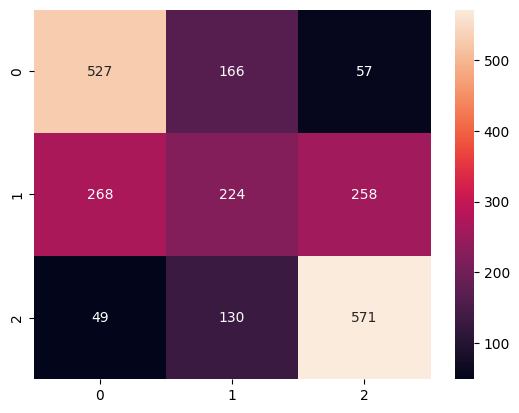

In [70]:
sns.heatmap(confusion_matrix(y_test_cnn, y_pred_cnn), annot=True, fmt='.0f')

In [64]:
def predict(text):
  text=vectorize(text)
  text=text.reshape(1,-1)
  text=scaler_cnn.transform(text)
  text=text.reshape(1,300,1)
  text=model_cnn.predict(text)
  print(f'''
    CATEGORY.             PROBABILITY
    _____________________________________
    Negative:             {text[0][0]}
    Neutral:              {text[0][1]}
    Positive:             {text[0][2]}

  ''')

In [69]:
neg='''
Disney Paris was a complete disappointment. The park was overcrowded, and the staff seemed indifferent to guests' experiences. The attractions were outdated and in desperate need of maintenance. The food was overpriced and of poor quality. Overall, a regrettable waste of time and money.
'''

predict(neg)

1/1 [==============================] - 0s 31ms/step

    CATEGORY.                   PROBABILITY
    ________________________________________
    Negative:           0.6987956762313843
    Neutral:              0.27947545051574707
    Positive:             0.021728873252868652

  


In [67]:
neutral='''
Disney Paris offered a mixed experience. The park had a diverse range of attractions catering to various age groups. While some staff members were helpful, others seemed disengaged. The park's cleanliness was acceptable, but there were moments of overcrowding. Food options were decent, though prices were on the higher side. Overall, a visit to Disney Paris may provide a moderate entertainment value depending on individual preferences.
'''
predict(neutral)

1/1 [==============================] - 0s 29ms/step

    CATEGORY.                   PROBABILITY
    ________________________________________
    Negative:           0.41967204213142395
    Neutral:              0.4274747371673584
    Positive:             0.15285326540470123

  


In [68]:
positive='''
Disney Paris provided a magical and enchanting experience. The park's attention to detail in recreating beloved Disney worlds was impressive. Staff members were friendly and went out of their way to enhance the guest experience. The attractions were well-maintained, and the entertainment options were diverse and captivating. The park's cleanliness and organization contributed to a seamless and enjoyable visit. From thrilling rides to charming character interactions, Disney Paris delivered a truly enchanting and memorable adventure for visitors of all ages.
'''

predict(positive)

No hay un embedding para la palabra wellmaintained. Omitiendo...
1/1 [==============================] - 0s 53ms/step

    CATEGORY.                   PROBABILITY
    ________________________________________
    Negative:           0.004886085633188486
    Neutral:              0.1050848588347435
    Positive:             0.8900290131568909

  


In [71]:
import joblib
joblib.dump(model_cnn, 'modelo_cnn_chido.pkl')


['modelo_cnn_chido.pkl']

In [72]:
from google.colab import files
# Descargar el archivo
files.download('modelo_cnn_chido.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# df = df.reset_index(drop=True)

In [45]:
# #FNNs
# from sklearn.model_selection import train_test_split

# X_fnn = df['vector']
# X_fnn = np.concatenate(X_fnn, axis=0).reshape(-1,300)
# y_fnn = df['Sentiment']

# X_train_fnn,X_test_fnn,y_train_fnn,y_test_fnn = train_test_split(X_fnn,
#                                                  y_fnn,
#                                                  train_size=0.80,
#                                                  random_state=10)

In [46]:
# df['Sentiment'].value_counts().plot(kind='bar')

In [47]:
# np.min(X_train_fnn)

In [48]:
# from sklearn.preprocessing import MinMaxScaler

# scaler_fnn= MinMaxScaler()

# X_train_fnn=scaler_fnn.fit_transform(X_train_fnn)
# X_test_fnn= scaler_fnn.transform(X_test_fnn)

In [49]:
# np.min(X_train_fnn)

In [50]:
# from keras.utils import to_categorical

# y_train_fnn = to_categorical(y_train_fnn, num_classes=3)
# y_test_fnn = to_categorical(y_test_fnn, num_classes=3)

In [51]:
# y_train_fnn

In [52]:
# from tensorflow import keras
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

In [53]:
# early_stopping_fnn= EarlyStopping(monitor='val_loss',
#                                   patience=8,
#                                   restore_best_weights=True)

In [54]:
# model_fnn= Sequential()
# model_fnn.add(Dense(units=130, activation='relu', input_dim=X_fnn.shape[1]))
# model_fnn.add(Dense(units=130, activation='relu'))
# model_fnn.add(Dropout(0.2))
# model_fnn.add(Dense(units=130, activation='relu'))
# model_fnn.add(Dropout(0.3))
# model_fnn.add(Dense(units=3, activation='softmax'))

# model_fnn.compile(optimizer=Adam(learning_rate=0.001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [55]:
# history_fnn= model_fnn.fit(X_train_fnn,
#                    y_train_fnn,
#                    batch_size=4,
#                    epochs=100,
#                    validation_data=(X_test_fnn, y_test_fnn),
#                    callbacks=[early_stopping_fnn])


In [56]:
# metrics_fnn= pd.DataFrame(history_fnn.history)
# metrics_fnn.head()

In [57]:
# import seaborn as sns
# sns.lineplot(data=metrics_fnn[['loss', 'val_loss']])

In [58]:
# sns.lineplot(data=metrics_fnn[['accuracy', 'val_accuracy']])

In [59]:
# y_pred_fnn=np.argmax(model_fnn.predict(X_test_fnn), axis=-1)
# y_pred_fnn

In [60]:
# y_test_fnn=np.argmax(y_test_fnn, axis=-1)
# print(y_test_fnn.shape)

In [61]:
# umbral= 0.5
# y_pred_fnn= np.where(y_pred_fnn>umbral, 1,0)
# y_pred_fnn

In [62]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(classification_report(y_test_fnn, y_pred_fnn))

In [63]:
# sns.heatmap(confusion_matrix(y_test_fnn, y_pred_fnn), annot=True, fmt='.0f')